# **Image Classifier**

## Project Content <a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Loading libraries and packages to embark our new journey](#2)
3. [Defining Some Functions to Make Everything Go Faster](#3)
4. [Loading and Checking The Dataset](#4)

### Second Step: Data Preprocessing

5. [Exploratory Data Analysis](#5)
6. [Numeric Fields Analysis](#6)
7. [Categorical Fields Analysis](#7)
8. [Feature Scaling](#8)
9. [Seperating Data into Two Parts of Train and Test](#9)

### Third and Final Step: Modeling

10. [First Time Modeling to Get Some Insights](#10)
11. [Logistic Regression Tuning](#11)
12. [Support Vector Machine Tuning](#12)
13. [Multi Layer Perceptron Tuning](#13)
14. [Decision Tree Tuning](#14)
15. [Random Forest Tuning](#15)
16. [Gradient Boosting Tuning](#16)
17. [Conclusion and Further Analysis Ideas](#17)

***

# First Step: First Organization

***

## 1. Introduction <a id = 1></a>

text

[Project Content](#0)

## 2. Loading libraries and packages to embark our new journey <a id = 2></a>

In order to get a fresh start, we should import the general and image-based libraries. 

In [1]:
# Basic Python Packages
import os
import random

# Numpy Library
import numpy as np

# Pandas Library and Settings
import pandas as pd

# Visualization Libraries (Matplotlib, Seaborn)
import matplotlib.pyplot as plt

# Tensorflow Library
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy, Recall, Precision
    
# OpenCV
import cv2
import imghdr

%matplotlib inline

[Project Content](#0)

## 2. Checking The Dataset <a id = 2></a>

Firstly, we want to create a variable for saving the directory of the dataset. Firstly let's check the data directory.

In [2]:
data_directory = "data"

print(f"{os.listdir(data_directory)}")

['test', 'train']


In [3]:
train_directory = os.path.join(data_directory, "train")
test_directory = os.path.join(data_directory, "test")

print(f"Data directory     {data_directory}")
print(f"Train directory    {train_directory}")
print(f"Test directory     {test_directory}")

Data directory     data
Train directory    data/train
Test directory     data/test


Now we want to check what there is in the train and test directories.

In [4]:
print(f"{os.listdir(train_directory)}")
print(f"{os.listdir(test_directory)}")

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


OK. It seems that there are seven types of face expressions in the dataset. Let's check the amount of data in each directory of the train and test directories.

Before going further, let's define a variable for different kinds of expressions.

In [5]:
expressions_list = os.listdir(train_directory)

In [6]:
train_dataset_info_df = pd.DataFrame(columns=["Expression", "Size", "Proportion %"])
train_expression_size = []

for expression in expressions_list:
    
    index = expressions_list.index(expression)
    
    train_expression_directory = os.path.join(train_directory, expression)
    train_expression_size.append(len(os.listdir(train_expression_directory)))
    
train_expression_proportion = [round((expression_size / sum(train_expression_size)) * 100, 2) for expression_size in train_expression_size]

train_dataset_info_df["Expression"] = expressions_list
train_dataset_info_df["Size"] = train_expression_size
train_dataset_info_df["Proportion %"] = train_expression_proportion

total_size = train_dataset_info_df["Size"].sum()
total_proportion = train_dataset_info_df["Proportion %"].sum()

total_row = pd.DataFrame({"Expression": ["Total"], "Size": [total_size], "Proportion %": [total_proportion]})
train_dataset_info_df = pd.concat([train_dataset_info_df, total_row], ignore_index=True)

train_dataset_info_df = train_dataset_info_df.style
train_dataset_info_df = train_dataset_info_df.apply(lambda x: ['background-color: green' if i == len(x)-1 else '' for i in range(len(x))], axis=0)

train_dataset_info_df

,Expression,Size,Proportion %
0,happy,7215,25.130000
1,sad,4830,16.820000
2,fear,4097,14.270000
3,surprise,3171,11.050000
4,neutral,4965,17.290000
5,angry,3995,13.920000
6,disgust,436,1.520000
7,Total,28709,100.000000


In [7]:
test_dataset_info_df = pd.DataFrame(columns=["Expression", "Size", "Proportion %"])
test_expression_size = []

for expression in expressions_list:
    
    index = expressions_list.index(expression)
    
    test_expression_directory = os.path.join(test_directory, expression)
    test_expression_size.append(len(os.listdir(test_expression_directory)))
    
test_expression_proportion = [round((expression_size / sum(test_expression_size)) * 100, 2) for expression_size in test_expression_size]

test_dataset_info_df["Expression"] = expressions_list
test_dataset_info_df["Size"] = test_expression_size
test_dataset_info_df["Proportion %"] = test_expression_proportion

total_size = test_dataset_info_df["Size"].sum()
total_proportion = test_dataset_info_df["Proportion %"].sum()

total_row = pd.DataFrame({"Expression": ["Total"], "Size": [total_size], "Proportion %": [total_proportion]})
test_dataset_info_df = pd.concat([test_dataset_info_df, total_row], ignore_index=True)

test_dataset_info_df = test_dataset_info_df.style
test_dataset_info_df = test_dataset_info_df.apply(lambda x: ['background-color: green' if i == len(x)-1 else '' for i in range(len(x))], axis=0)

test_dataset_info_df

,Expression,Size,Proportion %
0,happy,1774,24.710000
1,sad,1247,17.370000
2,fear,1024,14.270000
3,surprise,831,11.580000
4,neutral,1233,17.180000
5,angry,958,13.350000
6,disgust,111,1.550000
7,Total,7178,100.010000


It seems that about 20% of the data is in the test set and the rest are in the train set.

Let's check one image for each expression to get better understanding of the dataset.

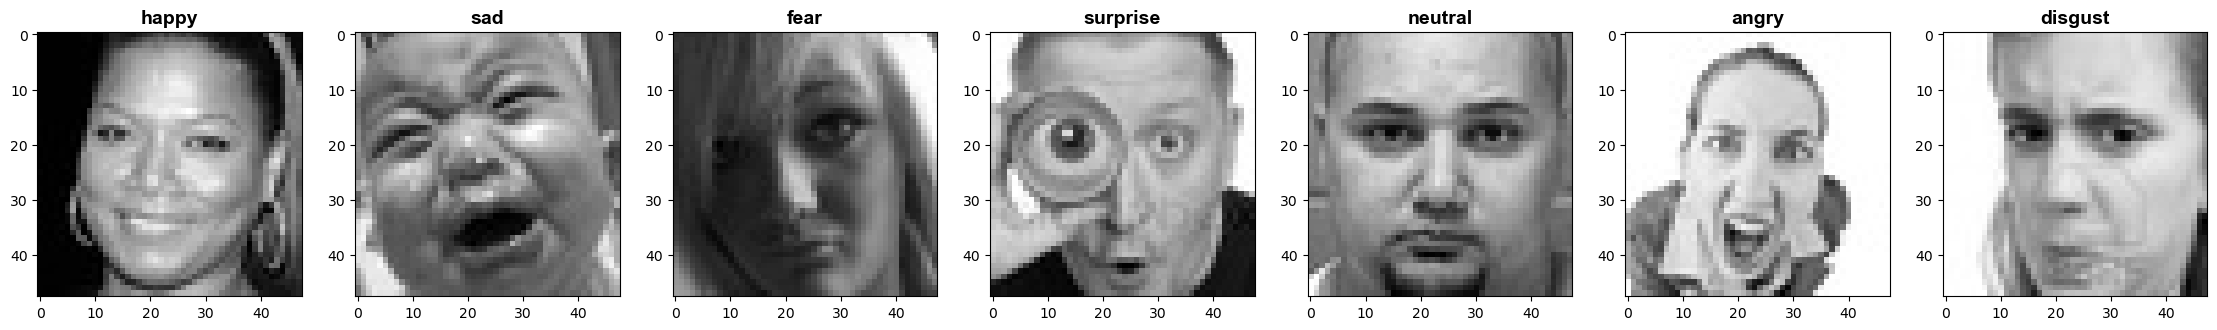

In [8]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

fig, axes = plt.subplots(1, len(expressions_list), figsize=(len(expressions_list) * 4, 4))

i = 0

while i < len(expressions_list):
    
    expression = expressions_list[i]

    expression_directory = os.path.join(train_directory, expression)
    images_list = os.listdir(expression_directory)
    
    image_directory = os.path.join(expression_directory, random.choice(images_list))
    
    image = cv2.imread(image_directory, cv2.IMREAD_GRAYSCALE)
        
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(expression, fontdict=title_font)
    
    i += 1

plt.show()

Nice. Let's get deeper to check the images as numpy arrays.

In [9]:
print(f"Images shape is: {image.shape}")

Images shape is: (48, 48)


And for the last step, we want to get assured that all field have the same format type.

In [24]:
formats = []

for dir in [train_directory, test_directory]:

    i = 0

    print(f"Checking {dir.split('/')[1]} data:")
    
    while i < len(expressions_list):
        
        expression = expressions_list[i]

        expression_directory = os.path.join(dir, expression)
        images_list = os.listdir(expression_directory)
        
        for image in images_list:
                    
            format = image.split(".")[1]
            
            if format not in formats:
                formats.append(format)

        print(f"    {expression} Checked.")
        
        i += 1

print("-"*30)
print(f"File formats are: {formats}")

Checking train data:
    happy Checked.
    sad Checked.
    fear Checked.
    surprise Checked.
    neutral Checked.
    angry Checked.
    disgust Checked.
Checking test data:
    happy Checked.
    sad Checked.
    fear Checked.
    surprise Checked.
    neutral Checked.
    angry Checked.
    disgust Checked.
------------------------------
File formats are: ['jpg']


Since everything is ok, we can get further and build a data pypeline.

[Project Content](#0)

## 3. Creating a Data Pipeline to Load The Dataset <a id = 3></a>

First of all, let's create a dataset from image files to use them for training the neural network.</br>
In this step, we also label the data.

In [40]:
train = tf.keras.preprocessing.image_dataset_from_directory(train_directory, image_size=(48, 48), color_mode="grayscale")

train

Found 28709 files belonging to 7 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

The calsses are assigned like the way below.

In [72]:
expressions_list = train.class_names

expressions_list

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In order to use the data, we should iterate over it using the numpy iterator.

In [41]:
train_iterator = train.as_numpy_iterator()

train_iterator

To use this iterated data, we have to get batch from it to feed the neural network. This step will be completed in the training stage.

In [67]:
batch = train_iterator.next()

print(f"Each batch has {len(batch)} parts of data.")
print(f"Each batch's images part has the shape of {batch[0].shape}")
print(f"Each batch's images part has the shape of {batch[1].shape}")

Each batch has 2 parts of data.
Each batch's images part has the shape of (32, 48, 48, 1)
Each batch's images part has the shape of (32,)


This means that each batch has two parts of data, images and labels.</br>
Images part has 32 images which are 

Before going further, let's check the train dataset by their labels.

Facial expressions are:
    0. angry
    1. disgust
    2. fear
    3. happy
    4. neutral
    5. sad
    6. surprise


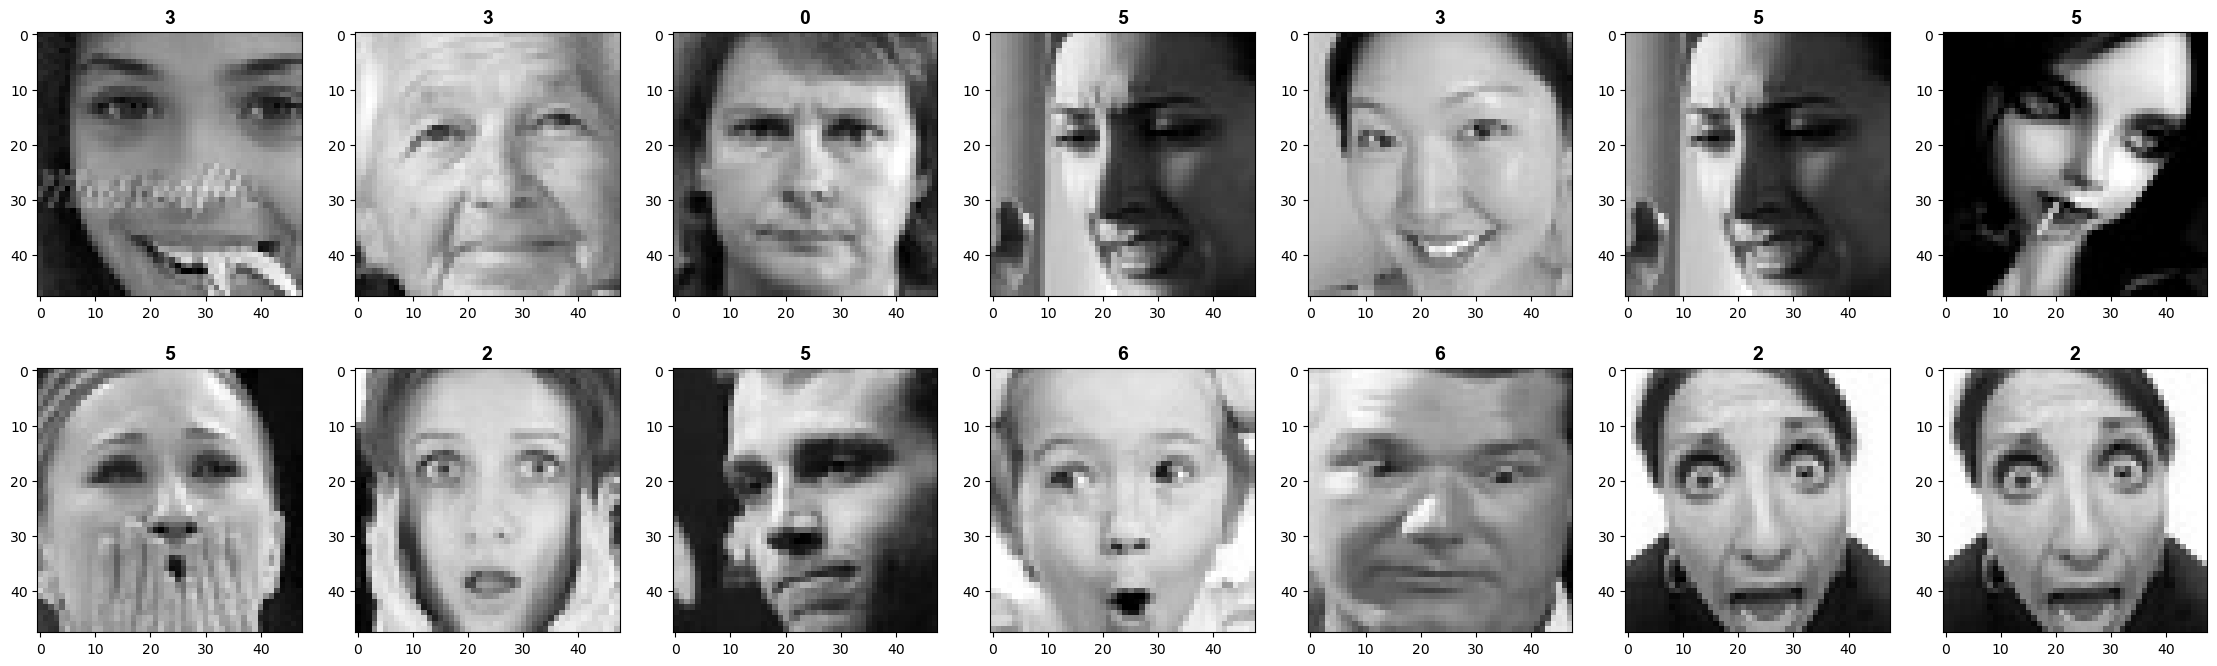

In [73]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

print("Facial expressions are:")

for expression in expressions_list:
    print(f"    {expressions_list.index(expression)}. {expression}")

indexes = np.random.randint(0, batch[0].shape[0], 14)

fig, axes = plt.subplots(2, 7, figsize=(28, 8))

i = 0
j = 0

for index in indexes:
    
    axes[i, j].imshow(batch[0][index].astype(int), cmap="gray")
    axes[i, j].set_title(batch[1][index], fontdict=title_font)

    j += 1
    
    if j==7:
        i = 1
        j = 0
        
plt.show()

[Project Content](#0)

***

# Second Step: Data Preprocessing

***

## 3. Scaling The Dataset <a id = 3></a>

Firstly, let's check the data values' minimum and maximum.

In [74]:
print(f"Data Minimum: {batch[0].min()}")
print(f"Data Maximum: {batch[0].max()}")

Data Minimum: 0.0
Data Maximum: 255.0


Like most of the times the range of values is between 0 and 255.</br>
Now we can scale the data by deviding its values by 255 to make the learning process faster.

We can do this by using the map function in data pipeline.

In [75]:
train = train.map(lambda x, y: (x/255., y))

Now, we've created the data scaler and the scaler is now embedded in the data pypeline.

Let's check the next batch.

In [87]:
batch = train.as_numpy_iterator().next()

print(f"Data Minimum: {batch[0].min()}")
print(f"Data Maximum: {batch[0].max()}")

Data Minimum: 0.0
Data Maximum: 1.0


As we know, this won't make any change in the images appearance.

***

# Third and The Final Step: Modeling

***

## 6. Defining Modeling Functions <a id = 6></a>

In order to create a deep neural network, we define the variable taking the whole model in it and then add settings and features in it.

In [132]:
def get_compiled_model(input_shape, optimizer, loss, metrics):
    """
    This is a Python function that compiles and returns a neural network model using the Keras library.

    Args:
        input_shape (tuple)               The shape of the input data for the model.
        optimizer (str or callable)       The optimizer to use for training the model.
        loss (str or callable)            The loss function to use during training.
        metrics (list)                    The list of evaluation metrics for the model.

    Returns:
        model ()                          The compiled Keras model object that can be used for training and evaluation.
    """
    
    model = Sequential()

    settings = [Conv2D(16, (3, 3), strides=1, activation="relu", input_shape=input_shape),
                
                MaxPool2D(),
                
                Conv2D(32, (3, 3), strides=1, activation="relu", input_shape=input_shape),
                
                MaxPool2D(),
                
                Flatten(),
                
                Dense(256, activation="relu",
                      kernel_initializer ="glorot_uniform",
                      bias_initializer = "zeros"),

                Dense(1, activation="sigmoid")]

    for setting in settings:
        model.add(setting)
        
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
    return model

In [133]:
def train_model(model, train_data, epochs, validation_data, callbacks):
    """
    Summary:
    This is a Python function that trains a given neural network model on the provided training data and returns the training history.

    Args:
        model (tensorflow.python.keras.engine.training.Model)   The neural network model object to train.
        train_data (numpy.ndarray)                              The training data to use for training the model.
        train_target (numpy.ndarray)                            The target values for the training data.
        epochs (int)                                            The number of epochs to train the model.
        validation_data (numpy.ndarray)                         The validation data to use for evaluating the model during training.
        callbacks (list)                                        A list of Keras callbacks to use during training.

    Returns:
        history ()                                              The training history object that contains information about the training and validation metrics over each epoch.
    """
    
    history = model.fit(train_data, epochs=epochs, validation_data=validation_data, callbacks=callbacks, verbose=1)
    
    return history

Here, we define some callbacks to get more insights when training, validating or testing the model.

In [134]:
logs_cb = callbacks.TensorBoard(log_dir="logs")

class TrainingCallbacks(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training ...")    

    def on_train_end(self, logs=None):
        print(f"Training Finished")
        
class TestingCallbacks(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing ...")    

    def on_test_end(self, logs=None):
        print(f"Testing Finished")
        
class PredictionCallbacks(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction ...")    

    def on_predict_end(self, logs=None):
        print(f"Prediction Finished")

2023-05-10 20:30:00.310113: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-10 20:30:00.310126: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2023-05-10 20:30:00.310181: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


## 7. Building The Model's Architecture <a id = 7></a>

By using the function above, now we can builld the architecture defined in the function and parameters determined as the arguments.

In [135]:
model = get_compiled_model((256, 256, 3),
                           optimizer="rmsprop",
                           loss="binary_crossentropy",
                           metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               31490304  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

It's better to plot the architecture to understand the network better.

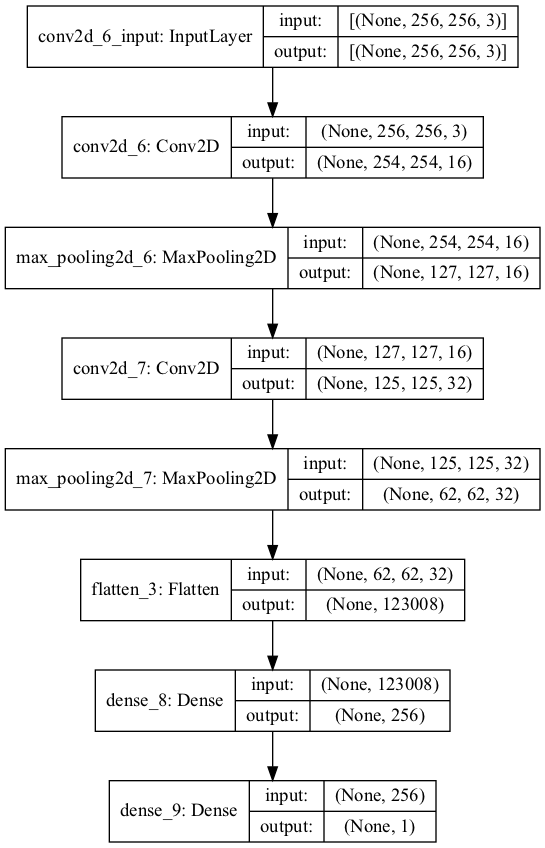

In [136]:
plot_model(model, show_shapes=True, show_layer_names=True)

## 8. First Time Training <a id = 8></a>

Now we can train the model and save its information in a variable to check it out later.

In [137]:
history = train_model(model, train_data=train, epochs=30, validation_data=validation, callbacks=[TrainingCallbacks(), logs_cb])

history_df = pd.DataFrame(history.history)

history_df

Starting training ...
Epoch 1/30


2023-05-10 20:30:01.023464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 5s - loss: 0.7074 - accuracy: 0.3750

2023-05-10 20:30:02.344205: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2023-05-10 20:30:02.344215: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


3/5 [=================>............] - ETA: 0s - loss: 18.1400 - accuracy: 0.4479

2023-05-10 20:30:02.607544: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-05-10 20:30:02.608077: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2023-05-10 20:30:02.609502: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_05_10_20_30_02
2023-05-10 20:30:02.609942: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_05_10_20_30_02/Shahriyar-Macbook.local.trace.json.gz
2023-05-10 20:30:02.610557: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2023_05_10_20_30_02
2023-05-10 20:30:02.610710: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2023_05_10_20_30_02/Shahriyar-Macbook.local.memory_profile.json.gz
2023-05-1

5/5 [==============================] - ETA: 0s - loss: 12.6040 - accuracy: 0.4750

2023-05-10 20:30:03.170588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 425ms/step - loss: 12.6040 - accuracy: 0.4750 - val_loss: 3.1437 - val_accuracy: 0.5625
Epoch 2/30
5/5 [==============================] - 2s 377ms/step - loss: 1.1985 - accuracy: 0.6000 - val_loss: 1.5611 - val_accuracy: 0.6562
Epoch 3/30
5/5 [==============================] - 2s 371ms/step - loss: 0.8264 - accuracy: 0.6375 - val_loss: 1.1625 - val_accuracy: 0.6562
Epoch 4/30
5/5 [==============================] - 2s 358ms/step - loss: 0.5997 - accuracy: 0.7750 - val_loss: 0.5461 - val_accuracy: 0.5938
Epoch 5/30
5/5 [==============================] - 2s 355ms/step - loss: 0.4423 - accuracy: 0.8062 - val_loss: 0.2271 - val_accuracy: 0.9062
Epoch 6/30
5/5 [==============================] - 2s 353ms/step - loss: 0.2715 - accuracy: 0.9375 - val_loss: 0.3154 - val_accuracy: 0.8125
Epoch 7/30
5/5 [==============================] - 2s 354ms/step - loss: 0.2640 - accuracy: 0.9125 - val_loss: 0.2196 - val_accuracy: 0.9688
Epoch 8/30
5/5 [==============

,loss,accuracy,val_loss,val_accuracy
0,12.603979,0.47500,3.143660,0.56250
1,1.198468,0.60000,1.561077,0.65625
2,0.826449,0.63750,1.162466,0.65625
3,0.599694,0.77500,0.546126,0.59375
4,0.442328,0.80625,0.227083,0.90625
5,0.271517,0.93750,0.315405,0.81250
6,0.264027,0.91250,0.219610,0.96875
7,0.380350,0.78125,0.373003,0.78125
8,0.281284,0.90000,0.107709,1.00000
9,0.117585,0.97500,0.086307,1.00000


## 9. Plotting The Models's Loss and Accuracy <a id = 9></a>

Let's check how the model performds in both training and validation datasets through epochs.

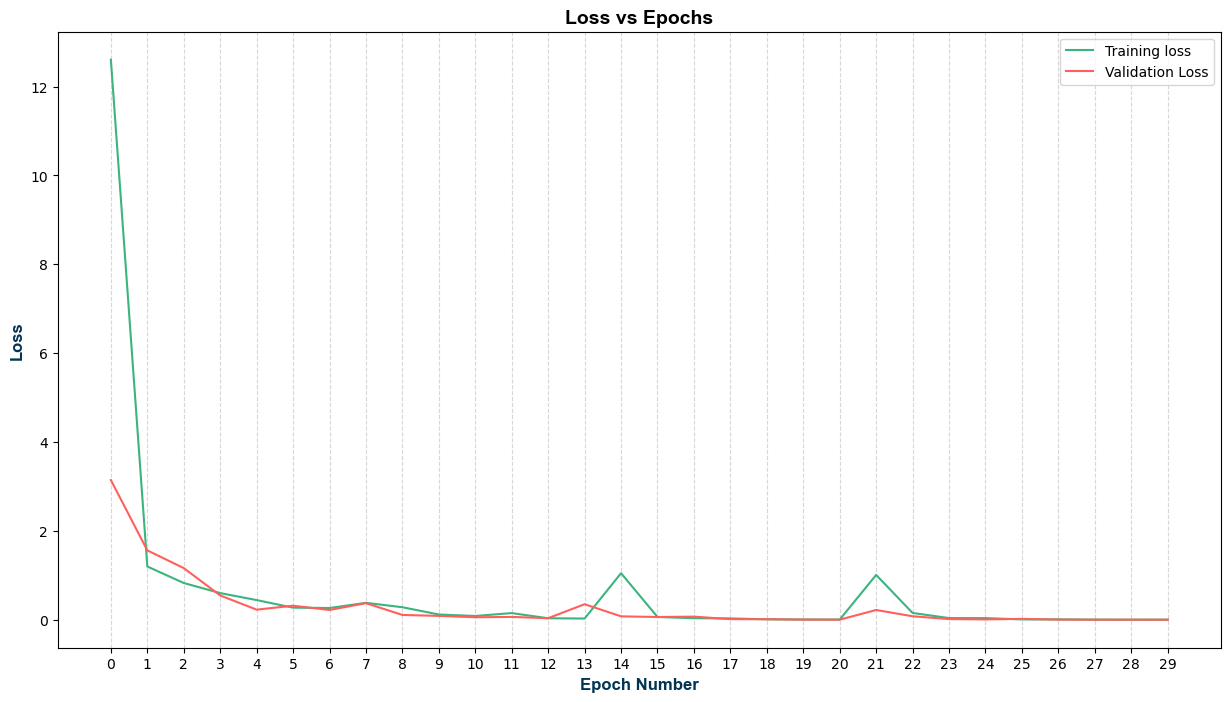

In [138]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(15, 8))

plt.plot(history.history["loss"], color="#3BB47E", label="Training loss")
plt.plot(history.history["val_loss"], color="#FF605C", label="Validation Loss")

plt.xticks(range(len(history.history["loss"])))

plt.legend(loc="upper right")

plt.title("Loss vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Loss", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

plt.show()

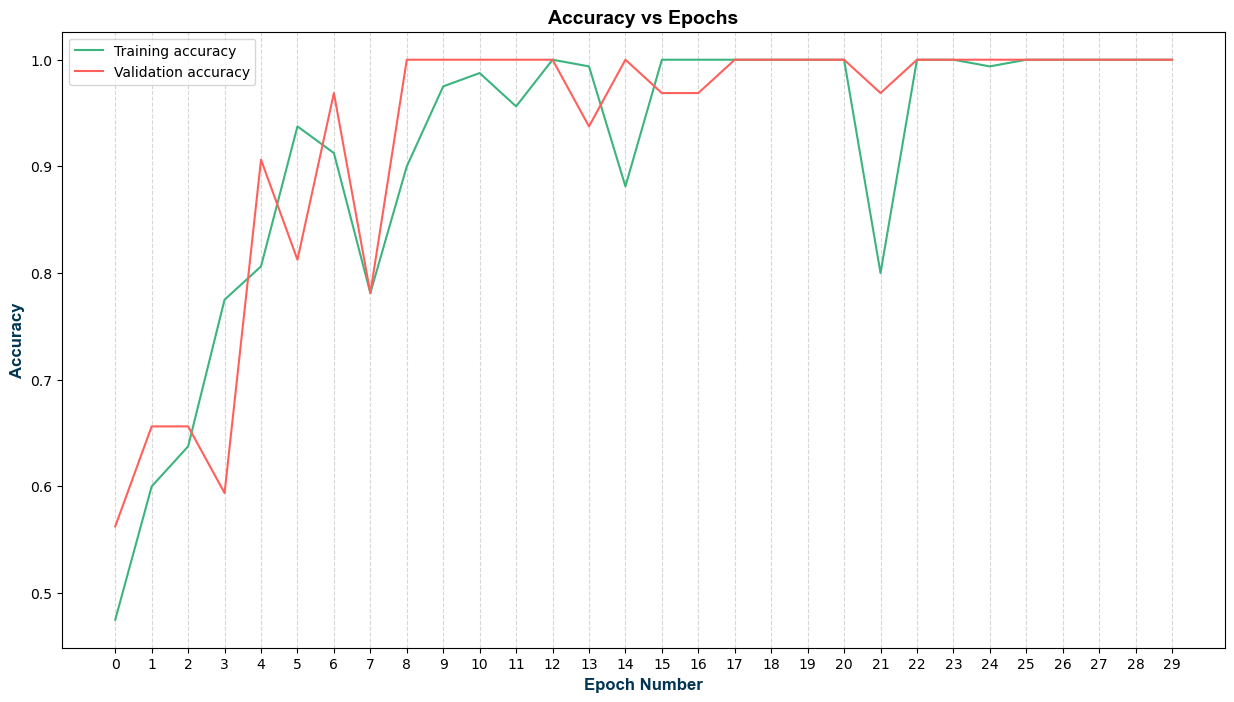

In [139]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(15, 8))

plt.plot(history.history["accuracy"], color="#3BB47E", label="Training accuracy")
plt.plot(history.history["val_accuracy"], color="#FF605C", label="Validation accuracy")

plt.xticks(range(len(history.history["accuracy"])))

plt.legend(loc="upper left")

plt.title("Accuracy vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Accuracy", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

plt.show()

## 10. Model's Performance Evaluation <a id = 10></a>

The last step is to check how the model performs on the testing dataset.</br>
For this goal we will evaluate the model using three metrics.

In [140]:
binary_accuracy = BinaryAccuracy()
recall = Recall()
precision = Precision()

Since we haven't load the dataset in the model we have to update the metrics for each batch of the test set.

In [141]:
for batch in test.as_numpy_iterator():
    
    test_data, test_target = batch
    test_target_pred = model.predict(test_data)
    
    binary_accuracy.update_state(test_target, test_target_pred)
    recall.update_state(test_target, test_target_pred)
    precision.update_state(test_target, test_target_pred)

2023-05-10 20:31:12.221418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [142]:
print("Testing Results")
print("-"*30)

print(f"Binary Accuracy   {(binary_accuracy.result()*100):.4f}")
print(f"Recall            {(recall.result()*100):.4f}")
print(f"Precision         {(precision.result()*100):.4f}")

Testing Results
------------------------------
Binary Accuracy   100.0000
Recall            100.0000
Precision         100.0000


It doesn't seem bad. Model performs acceptable on such a small dataset which is not cleaned enough.

Let's check the model's performance on an image out of Google.

## 10. Model's Performance Evaluation <a id = 10></a>

Let's show the image.

In [143]:
image_types

['jpeg', 'jpg', 'bmp', 'png']

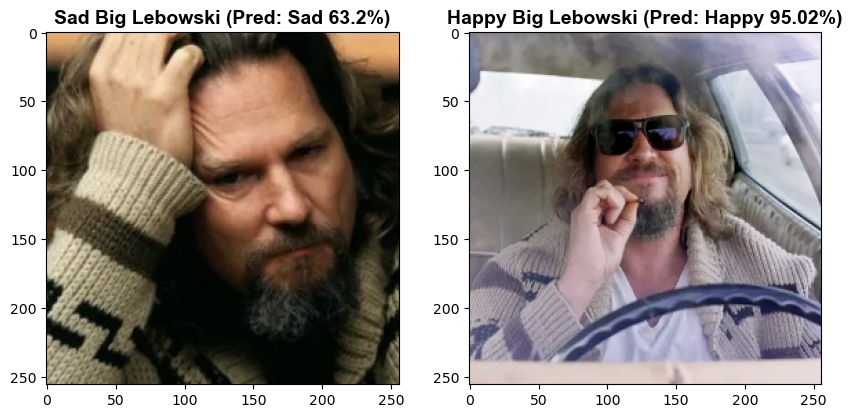

In [144]:
final_test_dir = "final_test"
final_test_list = os.listdir(final_test_dir)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

i = 0

for file_name in final_test_list:
    
    ext = os.path.splitext(file_name)[-1].lower()
    
    if ext[1:] in image_types:
        
        image = cv2.imread(os.path.join(final_test_dir, file_name))
        color_fixed_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = tf.image.resize(color_fixed_image, (256, 256))
        final_image = resized_image.numpy().astype(int)

        test_target_pred = model.predict(np.expand_dims(final_image/255, 0))
        sad_prob = round(test_target_pred[0][0]*100, 2)
        happy_prob = round((100 - sad_prob), 2)
        
        if happy_prob > sad_prob:
            pred = f"Happy {happy_prob}"
        else:
            pred = f"Sad {sad_prob}"

        title = f"{file_name.split('.')[0]} (Pred: {pred}%)"                           
                                                        
        axes[i].imshow(final_image)
        axes[i].set_title(title, fontdict=title_font)
        
        i += 1
        
plt.show()